In [1]:
using LinearAlgebra 
using Kronecker
using MKL
using Plots, PyPlot
using Random, Distributions
using RandomMatrices


(process:12804): GLib-GIO-WARNING **: 23:20:47.123: Unexpectedly, UWP app `KDEe.V.Okular_22.801.1132.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


In [2]:
#Defining the Basic Gates



#The X,Y,Z gates:

X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];

# The Hadamard and the Phase Gates:

H=1/sqrt(2)*[1 1 ; 1 -1];
S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];


#The finite X,Y,Z Rotations:


function RX(r)
    exp(-im*r/2*X)
end


function RY(r)
    exp(-im*r/2*Y)
end


function RZ(r)
    exp(-im*r/2*Z)
end


#The two-body gates:

CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);

In [3]:
o=pi;
hz=rand(12)*2*pi;
hy=rand(12)*2*pi;
J=rand(12)*2*pi;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RZ(hz[1]),RZ(hz[2]),RZ(hz[3]),RZ(hz[4]),RZ(hz[5]),RZ(hz[6]),RZ(hz[7]),RZ(hz[8]),RZ(hz[9]),RZ(hz[10]),RZ(hz[11]),RZ(hz[12])));
YRow=copy(kronecker(RY(hy[1]),RY(hy[2]),RY(hy[3]),RY(hy[4]),RY(hy[5]),RY(hy[6]),RY(hy[7]),RY(hy[8]),RY(hy[9]),RY(hy[10]),RY(hy[11]),RY(hy[12])));


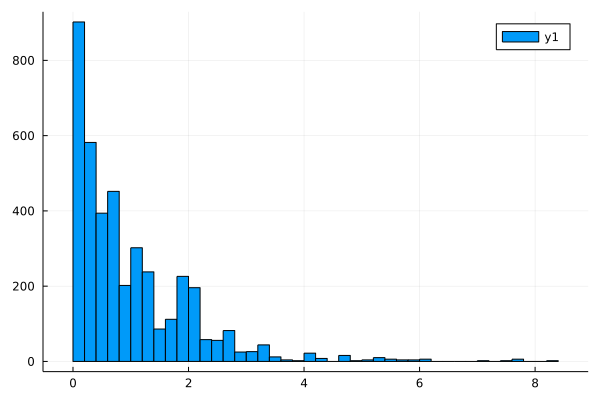

In [6]:
A=XRow*ZRow*YRow
    
   
  
    
EigA=eigvals(A);

N=fill(0.1,length(EigA))
N=angle.(EigA);

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

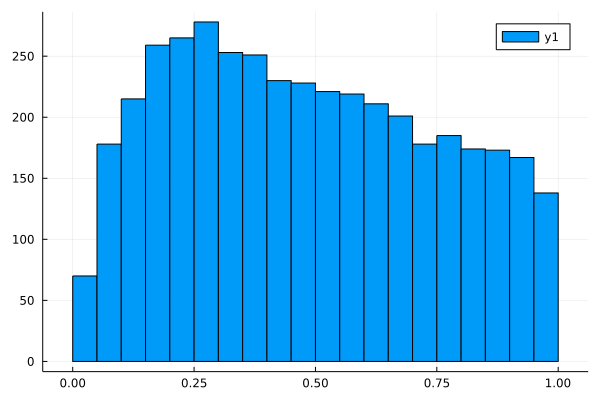

In [17]:

n=fill(0.1,length(EigA)-2);

for i in 1:length(n)
    #n[i]=m[i+1]/m[i];
    n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
end

histogram(n)

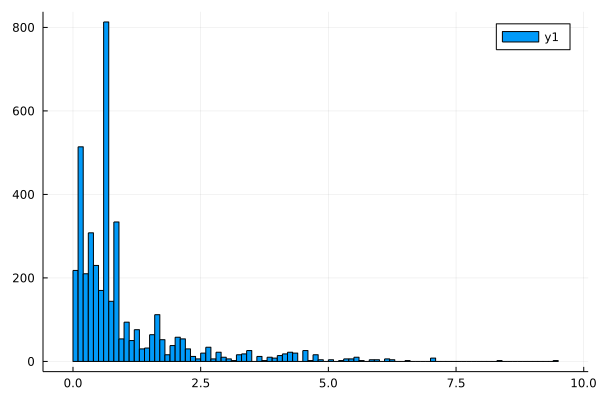

In [28]:
A=XRow*YRow*ZRow
    
   
  
    
EigA=eigvals(A);

N=fill(0.1,length(EigA))
N=angle.(EigA);

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

In [11]:
mean(n)

LoadError: UndefVarError: n not defined

In [11]:
Zkron=copy(kronecker(Z,Z));

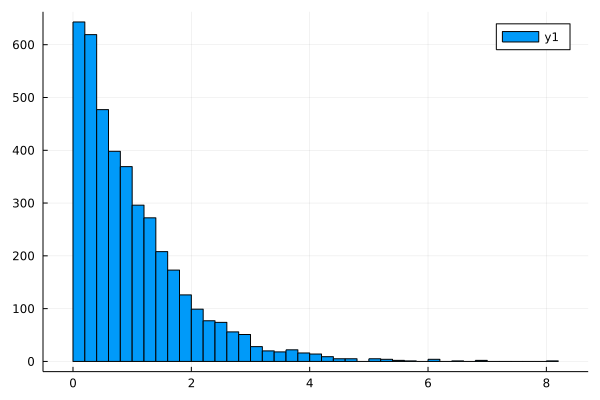

In [38]:

RH1=fill(fill(0.1+im, 2,2), 12);
RU=fill(fill(0.1+im, 2,2), 12);

#Generating a GUE:

l = Normal(0, 0.50);   #off diagonal elements
d = Normal(0, 1.00);   #diagonal elements


for j in 1:length(RU)
    
    
    A=rand(l,2,2)+im*rand(l,2,2);
    for i in 1:dim(A)
        A[i,i]=rand(d)+im*rand(d);
    end
    
#Symmetrisation and Exponentiation:
    
    
    RH1[j]=(A+A')/2;
    
end



FU=fill(fill(0.1+im, 4,4), 6);

#Looping:

    alpha=0.11;
       
    for j in 1:length(RU)
        RU[j]=exp(im*alpha*RH1[j]);
    end


    for j in 1:length(FU)
        FU[j]=CNOT*kronecker(RU[j],RU[j+6])*CNOT
    end


    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[2],FU[3],FU[4],FU[5],FU[6],I(2)));






    A=XRow*UEven*UOdd*YRow*ZRow
    
   
    
    EigA=eigvals(A);
    N=fill(0.1,length(EigA))


        for i in 1:length(EigA)
            N[i]=real(log(EigA[i])/(-im));
        end

    N= sort(N,rev=true);
    EigA1=copy(N);
    ls = deleteat!(EigA1,1);
    la = deleteat!(N,length(N));
    m=copy(la-ls)/mean(la-ls)
    
    
    
    histogram(m)
    
    
    

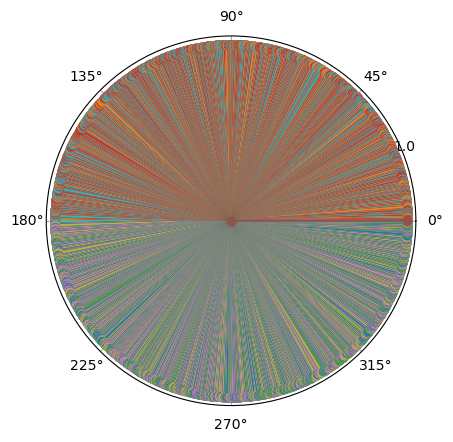

4096-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B2620>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B3700>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B3880>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B3A00>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B3B80>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B3D00>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B3AF0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B1870>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B0670>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B1E40>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B2440>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B11B0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000C64B1810>]
 ⋮
 [PyObject <matplotlib.lines.Line2D object at 0x000000009A1AE770>]
 [PyObject <m

In [9]:
polar.(Base.vect.(0.0,angle.(EigA)),Base.vect.(0.0,abs.(EigA)),marker="o")

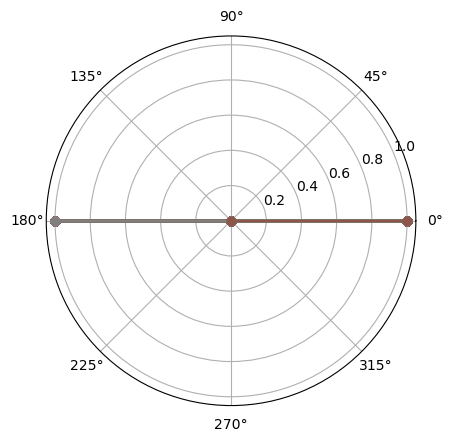

4096-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAC2620>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAC3D00>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAC3E80>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAFC040>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAFC1C0>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAFC340>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAFC4C0>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAFC640>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAFC7C0>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAFC940>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAC2D70>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAC1060>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000008FAFC880>]
 ⋮
 [PyObject <matplotlib.lines.Line2D object at 0x000000007FB034C0>]
 [PyObject <m

In [7]:
polar.(Base.vect.(0.0,angle.(EigA)),Base.vect.(0.0,abs.(EigA)),marker="o")

In [47]:
gr();
 
#plot
histogram(m)

#save plot
Plots.savefig("fig/X-ZRow-MBL-Alpha=0.11-s.png")

In [48]:
gr();
 
#plot
histogram(n)

#save plot
Plots.savefig("fig/X-ZRow-MBL-Alpha=0.11-s.png")

In [53]:
xax=1:12
gr();
 
#plot
Plots.plot(xax,h)

#save plot
Plots.savefig("fig/Disorder.png")

DTC

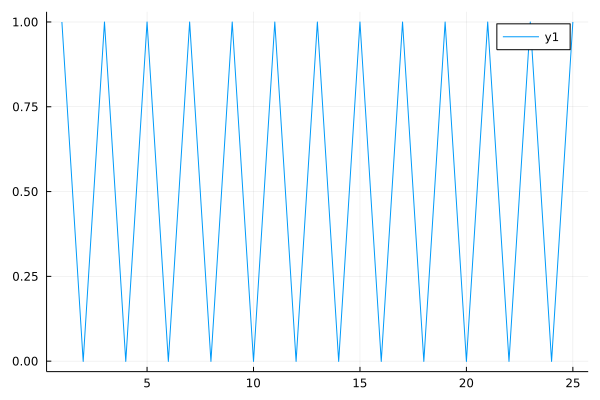

In [9]:
A=XRow*ZRow*YRow*ZRow

Zi=fill(fill(0.1+im, 4096,4096), 12);



Zi[1]=copy(kronecker(Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[2]=copy(kronecker(I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[3]=copy(kronecker(I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[4]=copy(kronecker(I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[5]=copy(kronecker(I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[6]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[7]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2)));
Zi[8]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2)));
Zi[9]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2)));
Zi[10]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2)));
Zi[11]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2)));
Zi[12]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z));


Cii=fill(0.1, 12,25);



At=I(4096);
for t in 1:25
    #for l in 1:12
        LM=copy(Zi[5]*At*Zi[5]);
        Cii[5,t]=real(LM[1365,1365]);
    #end
    At=A*At;
end


xax=1:25
Plots.plot(xax,Cii[5,:])


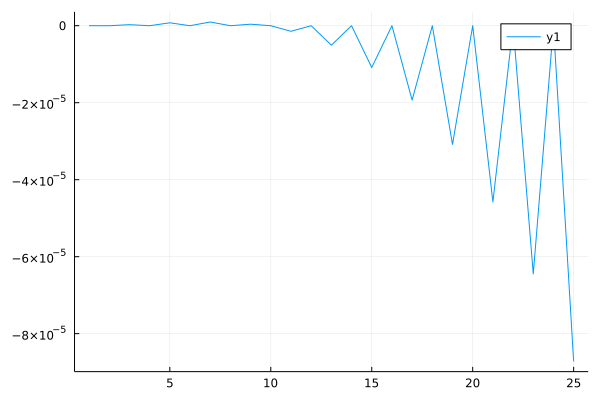

In [23]:
Plots.plot(xax,Cii[3,:])

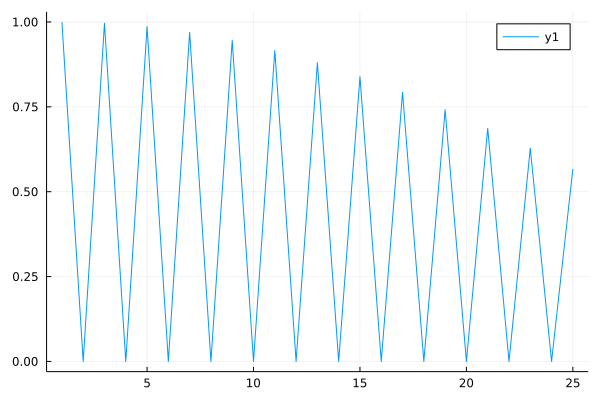

In [24]:
Plots.plot(xax,Cii[4,:])

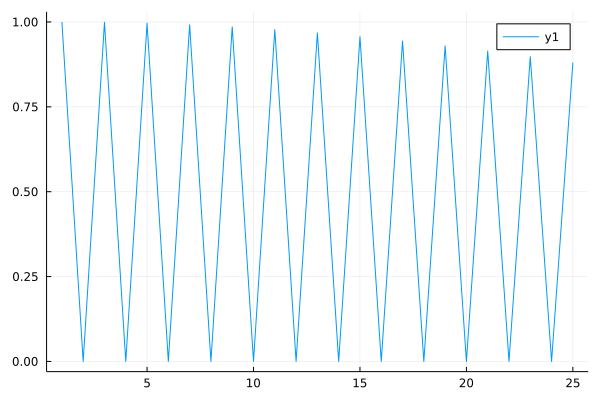

In [25]:
Plots.plot(xax,Cii[5,:])

In [34]:
eigvals(Z*RX(pi)*Z)

2-element Vector{ComplexF64}:
 1.1102230246251565e-16 - 1.0im
 1.1102230246251565e-16 + 0.9999999999999997im

In [15]:
exp(-im*Y)*exp(-im*Z)-exp(-im*Z)*exp(-im*Y)

2×2 Matrix{ComplexF64}:
 0.0+0.0im      0.0-1.41615im
 0.0-1.41615im  0.0+0.0im

In [16]:
exp(-im*Z)

2×2 Matrix{ComplexF64}:
 0.540302-0.841471im       0.0+0.0im
      0.0+0.0im       0.540302+0.841471im

In [17]:
exp(-im*Y)

2×2 Matrix{ComplexF64}:
 0.540302+0.0im  -0.841471+0.0im
 0.841471+0.0im   0.540302+0.0im

In [18]:
exp(-im*X)

2×2 Matrix{ComplexF64}:
 0.540302+0.0im            0.0-0.841471im
      0.0-0.841471im  0.540302+0.0im

In [23]:
-im*X*exp(-im*Z)*exp(-im*Y)

2×2 Matrix{ComplexF64}:
  0.708073-0.454649im  0.454649-0.291927im
 -0.454649-0.291927im  0.708073+0.454649im

In [25]:
eigvals(X*exp(-im*Z)*exp(-im*Y))

2-element Vector{ComplexF64}:
 -0.7061388208662513 + 0.7080734182735711im
  0.7061388208662513 + 0.7080734182735711im